# Heart Disease Prediction Project Documentation

# Introduction
This project aims to predict the likelihood of heart disease in patients using a dataset with various medical features. The primary goal is to explore data, engineer useful features, build machine learning models, and select the best-performing model using metrics and tuning techniques.


**Dataset Overview**
 - The dataset contains features such as age, chest pain type, cholesterol level, resting blood pressure, max heart rate, and more. The target variable indicates the presence (1) or absence (0) of heart disease. 
     - **note the original dataset contains multi class target ranges from 1 to 4. For ease i defined it as a two way classification target variable based on the distribution of heart disease and their class balance.**

## 1. Collecting and importing of the dataset

In [1]:
import numpy as np 
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


- The dataset is related to heart disease — likely the UCI Heart Disease dataset.

- df.info() helps get a summary of columns, data types, and null values.

In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



## 2. Data Preprocessing
- **Missing Values**: Imputed numerical columns with mean/median based on distribution. Categorical columns were filled using mode.
- **Encoding**: Categorical variables were label encoded for compatibility with tree-based models.
- **Scaling**: StandardScaler used where necessary (Logistic Regression, SVM, XGBoost).
- **Target Simplification**: Converted target variable to binary classification (presence vs. absence).


In [4]:
df = df.drop(columns=["id", "dataset"])

- Summarizes the numerical columns: mean, std, min, max, etc.

- Good for spotting outliers and understanding data spread.

In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

###  Feature Enggineering ---> Renaming cols for readability

In [7]:
df.columns = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
            'resting_electrocardiograph', 'max_heart_rate', 'exercise_induced_angina',
           'ST_rate', 'slope', 'major_vessels_fluoroscopy', 'thalassemia', 'target']

In [8]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']
print(f"Categorical columns: {cat_col}")
print(f"Numerical columns: {num_col}")

Categorical columns: ['sex', 'chest_pain', 'fasting_blood_sugar', 'resting_electrocardiograph', 'exercise_induced_angina', 'slope', 'thalassemia']
Numerical columns: ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'ST_rate', 'major_vessels_fluoroscopy', 'target']


In [9]:
df[cat_col].nunique()

sex                           2
chest_pain                    4
fasting_blood_sugar           2
resting_electrocardiograph    3
exercise_induced_angina       2
slope                         3
thalassemia                   3
dtype: int64

### Checking for duplicates

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
915    False
916    False
917    False
918    False
919    False
Length: 920, dtype: bool

### Plotting histogram to understand the distribution of the data and to get insights to fill in the missing data points.

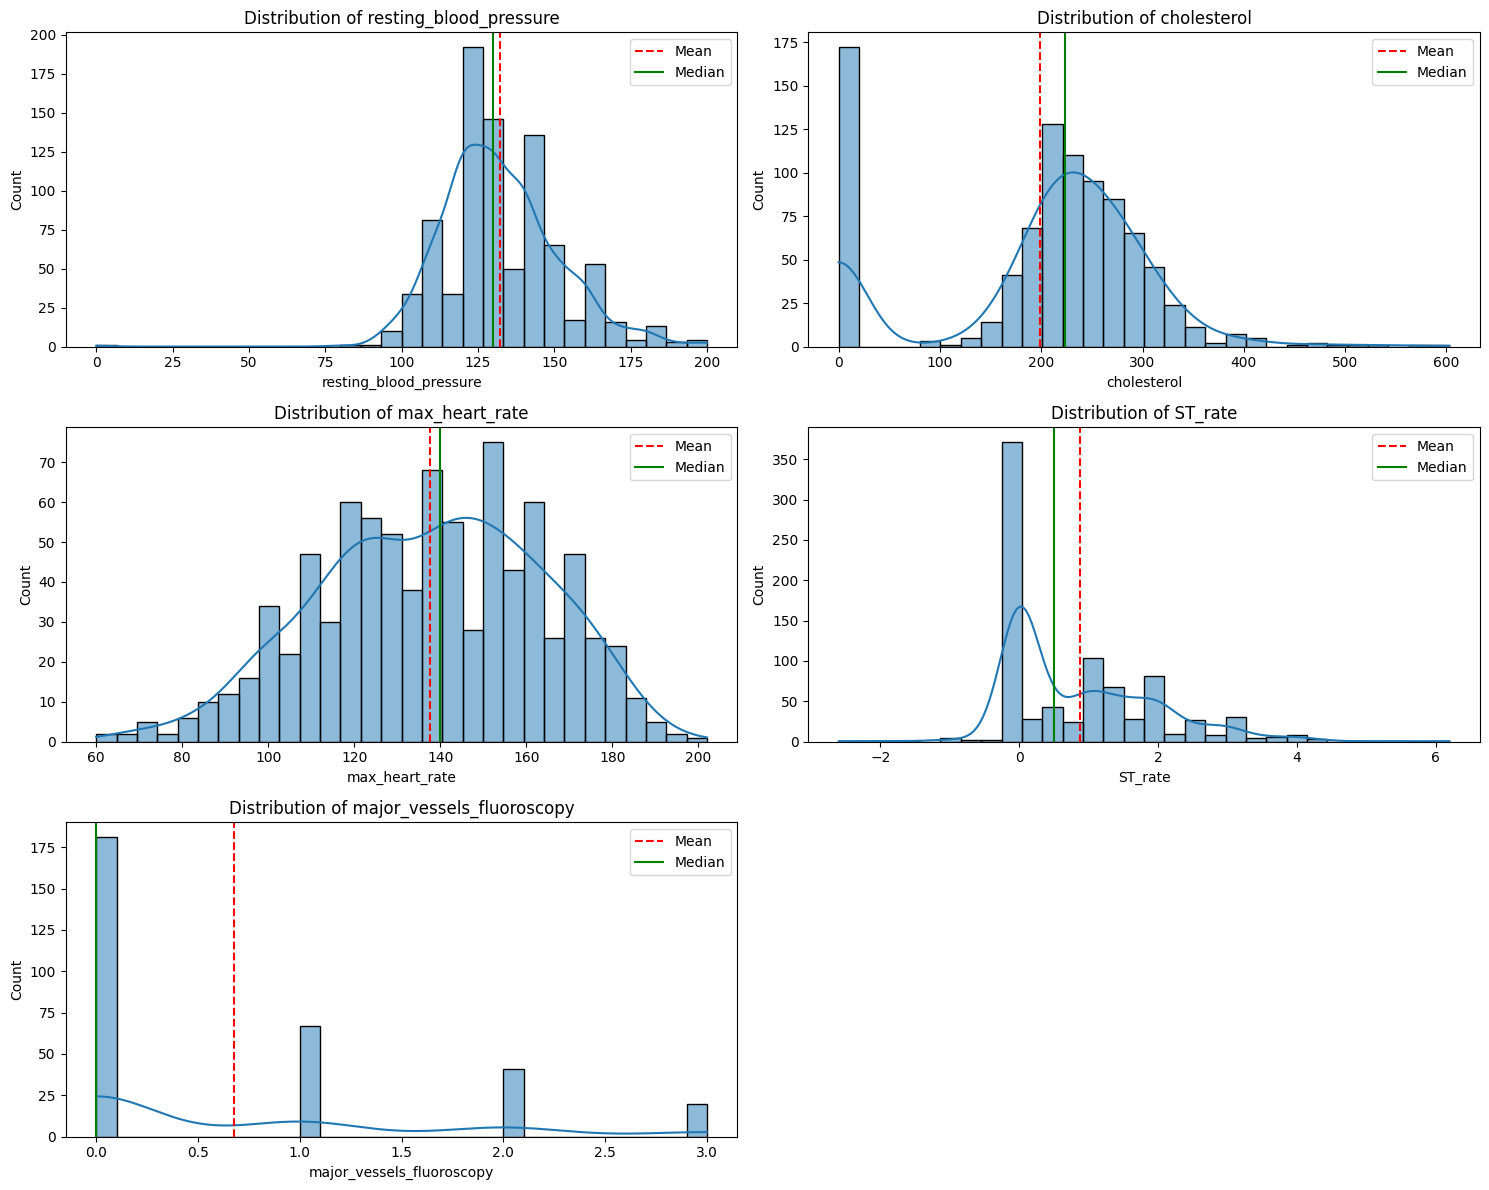

In [11]:
num_cols_with_na = ['resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'ST_rate', 'major_vessels_fluoroscopy']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols_with_na):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    axes[i].axvline(df[col].median(), color='g', linestyle='-', label='Median')
    axes[i].legend()

for j in range(len(num_cols_with_na), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Handling missing values based on the above hist plot

In [82]:
df['resting_blood_pressure'] = df['resting_blood_pressure'].fillna(df['resting_blood_pressure'].mean())
df['cholesterol'] = df['cholesterol'].fillna(df['cholesterol'].median())
df['max_heart_rate'] = df['max_heart_rate'].fillna(df['max_heart_rate'].mean())
df['ST_rate'] = df['ST_rate'].fillna(df['ST_rate'].median())
df['major_vessels_fluoroscopy'] = df['major_vessels_fluoroscopy'].fillna(df['major_vessels_fluoroscopy'].median())

In [ ]:

#Categorical columns: ['sex', 'chest_pain', 'fasting_blood_sugar', 'resting_electrocardiograph', 'exercise_induced_angina',
#  'slope', 'thalassemia']

cat_low_na = ['sex', 'chest_pain', 'fasting_blood_sugar',
              'resting_electrocardiograph', 'exercise_induced_angina']

for col in cat_low_na:
    if col in df.columns:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
    else:
        print(f"Column '{col}' not found in the DataFrame.")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\1886139184.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_val)


In [84]:
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
df['thalassemia'] = df['thalassemia'].fillna(df['thalassemia'].mode()[0])

In [85]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
df['target'].value_counts(normalize=True)  # Shows % of each class

target
1    0.553261
0    0.446739
Name: proportion, dtype: float64

In [86]:
# Categorical columns to encode
cat_cols = ['sex', 'chest_pain', 'fasting_blood_sugar',
            'resting_electrocardiograph', 'exercise_induced_angina',
            'slope', 'thalassemia']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [87]:
print(df.isnull().sum())  

age                           0
sex                           0
chest_pain                    0
resting_blood_pressure        0
cholesterol                   0
fasting_blood_sugar           0
resting_electrocardiograph    0
max_heart_rate                0
exercise_induced_angina       0
ST_rate                       0
slope                         0
major_vessels_fluoroscopy     0
thalassemia                   0
target                        0
dtype: int64


In [88]:
df.shape

(920, 14)

## 3. Exploratory Data Analysis (EDA)
- **Distribution Plots**: Visualized feature distributions with respect to the target.
- **Boxplots**: Showed key differences in features like max heart rate, cholesterol, ST depression by target class.
- **Count Plots**: Chest pain types and fasting blood sugar were strongly related to heart disease presence.
- **Correlation Matrix**: Highlighted strong positive correlation between chest pain and target.

### Distrubution of Heart Disease(Target)

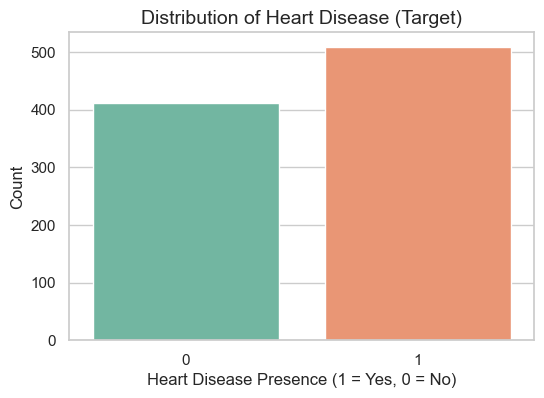

In [89]:
#Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', hue='target', palette='Set2', legend=False)
plt.title('Distribution of Heart Disease (Target)', fontsize=14)
plt.xlabel('Heart Disease Presence (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


### Age Vs Target

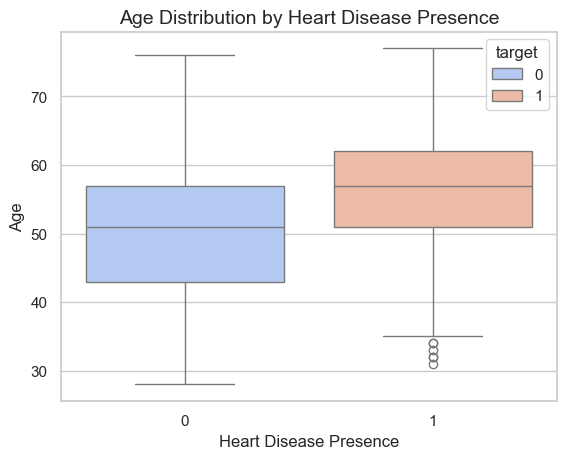

In [90]:
# 2. Age vs Target
sns.boxplot(data=df, x='target', hue= 'target', y='age', palette='coolwarm')
plt.title('Age Distribution by Heart Disease Presence', fontsize=14)
plt.xlabel('Heart Disease Presence')
plt.ylabel('Age')
plt.show()

### visualising various other distributions and plotting the heat map to find the correlations among the features

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\959601399.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values,


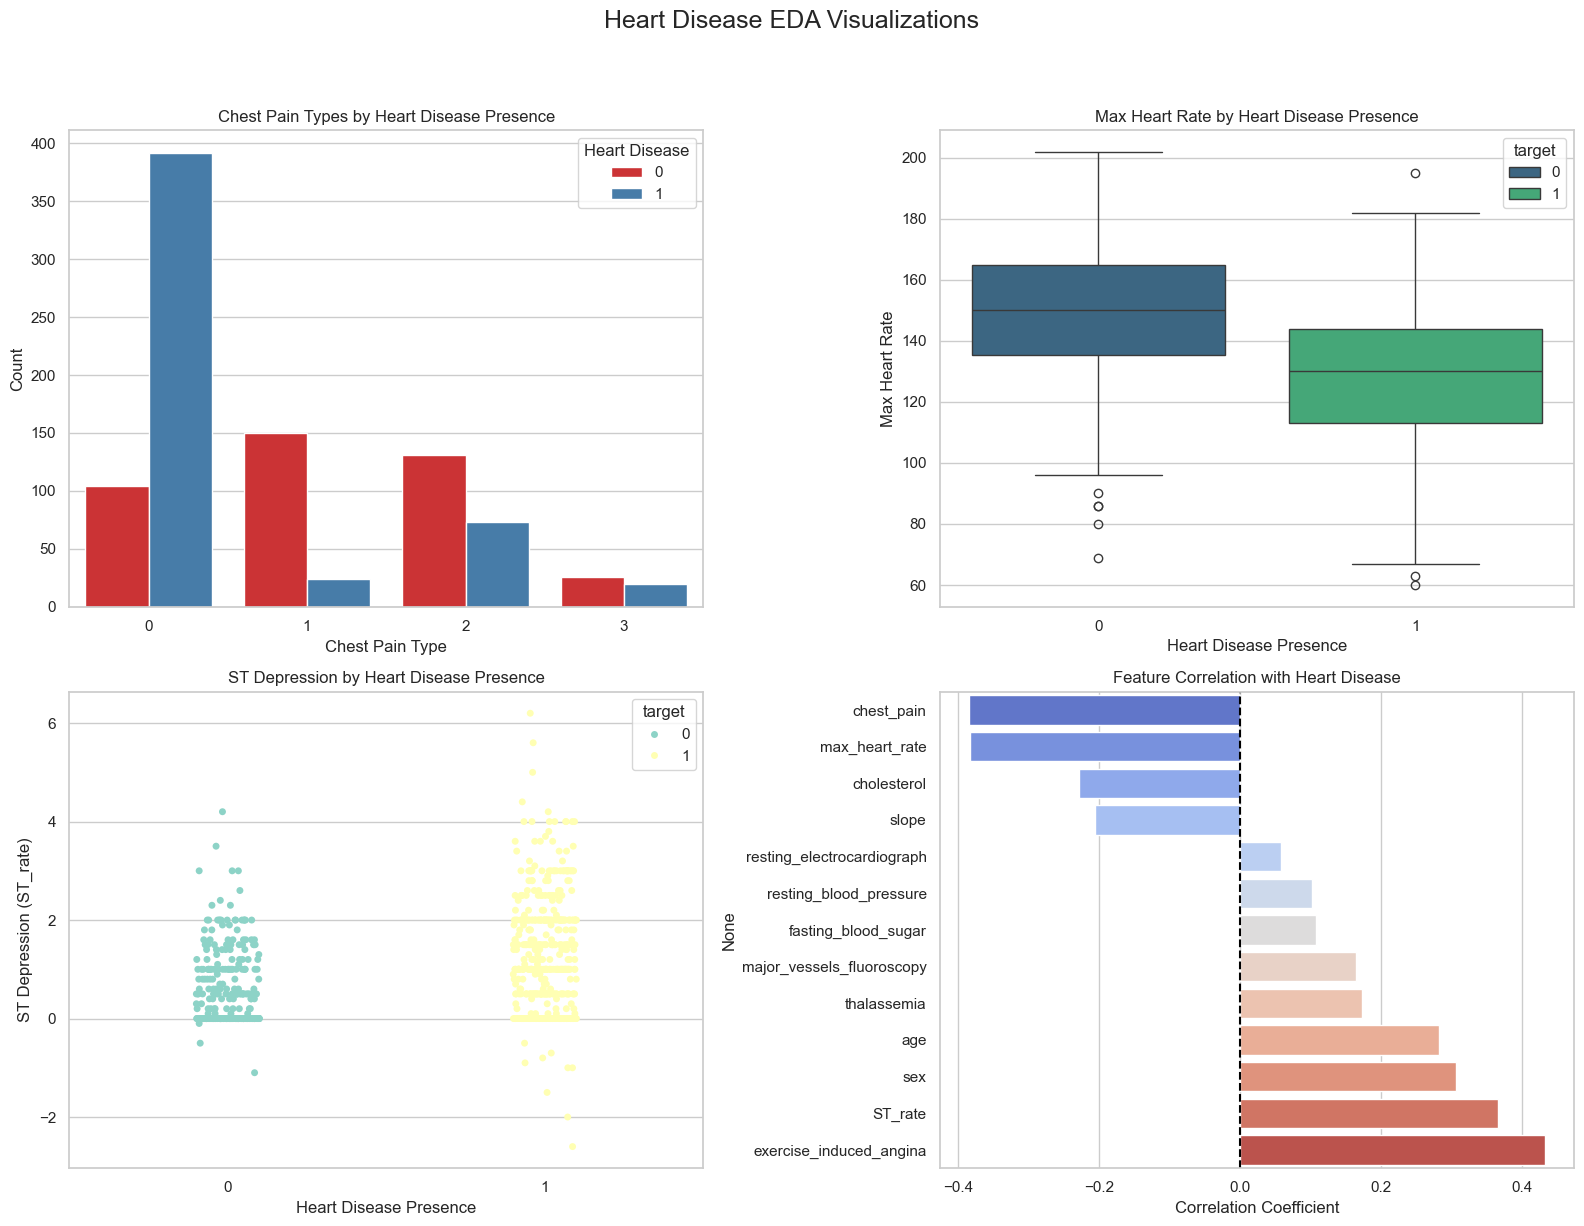

In [91]:
# Set up figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Heart Disease EDA Visualizations', fontsize=18, y=1.02)

# 1. Chest Pain vs Target
sns.countplot(data=df, x='chest_pain', hue='target', palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title('Chest Pain Types by Heart Disease Presence')
axes[0, 0].set_xlabel('Chest Pain Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Heart Disease')

# 2. Max Heart Rate vs Target
sns.boxplot(data=df, x='target', hue='target', y='max_heart_rate', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Max Heart Rate by Heart Disease Presence')
axes[0, 1].set_xlabel('Heart Disease Presence')
axes[0, 1].set_ylabel('Max Heart Rate')

# 3. ST Depression vs Target
sns.stripplot(data=df, x='target', hue='target', y='ST_rate', jitter=True, palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('ST Depression by Heart Disease Presence')
axes[1, 0].set_xlabel('Heart Disease Presence')
axes[1, 0].set_ylabel('ST Depression (ST_rate)')

# 4. Correlation with Target
correlation_with_target = df.corr(numeric_only=True)['target'].drop('target').sort_values()
sns.barplot(x=correlation_with_target.values,
            y=correlation_with_target.index,
            palette='coolwarm',
            ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation with Heart Disease')
axes[1, 1].set_xlabel('Correlation Coefficient')
axes[1, 1].axvline(0, color='black', linestyle='--')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # for spacing under the suptitle
plt.show()


### Box plot to visualise the outliers in features

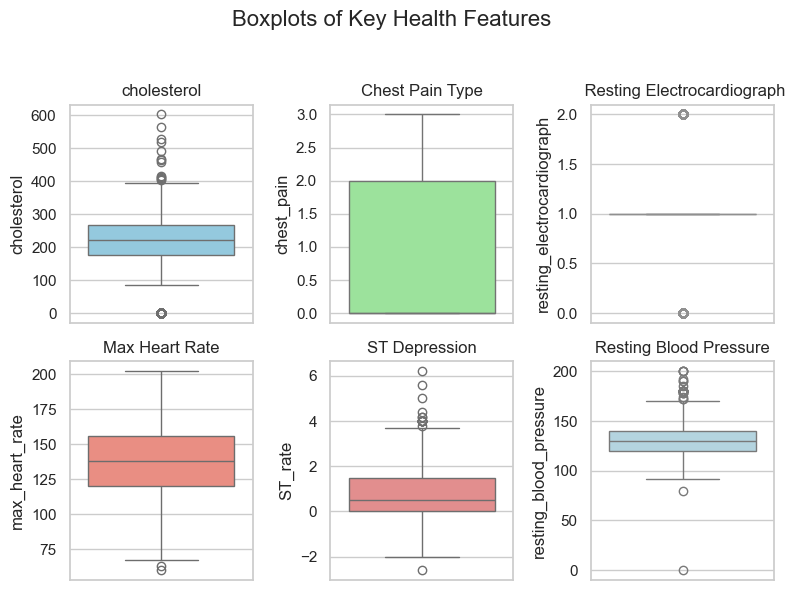

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(8, 6))
fig.suptitle('Boxplots of Key Health Features', fontsize=16)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

sns.boxplot(y=df["cholesterol"], color="skyblue", ax=axes[0][0])
axes[0][0].set_title("cholesterol")

sns.boxplot(y=df["chest_pain"], color="lightgreen", ax=axes[0][1])
axes[0][1].set_title("Chest Pain Type")

sns.boxplot(y=df["resting_electrocardiograph"], color="lightyellow", ax=axes[0][2])
axes[0][2].set_title(" Resting Electrocardiograph")

sns.boxplot(y=df["max_heart_rate"], color="salmon", ax=axes[1][0])
axes[1][0].set_title("Max Heart Rate")

sns.boxplot(y=df["ST_rate"], color="lightcoral", ax=axes[1][1])
axes[1][1].set_title("ST Depression")

sns.boxplot(y=df["resting_blood_pressure"], color="lightblue", ax=axes[1][2])
axes[1][2].set_title("Resting Blood Pressure")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 4. Feature Engineering & Selection
- Used feature importances from Random Forest and XGBoost to identify top features:
  - Chest pain, cholesterol, max heart rate, ST_rate, age, etc.
- Selected top 8 features for refined modeling.

In [ ]:
X = df.drop(columns=['target'])
y = df['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (736, 13)
X_test shape: (184, 13)
y_train shape: (736,)
y_test shape: (184,)



## 5. Model Building & Evaluation
### Models Trained:
- Logistic Regression
- Decision Tree
- Support Vector Machine (SVM)
- Random Forest
- XGBoost

### Evaluation Metrics:
- Accuracy
- Confusion Matrix
- Precision, Recall, F1-Score

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8532608695652174

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83        75
           1       0.89      0.85      0.87       109

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



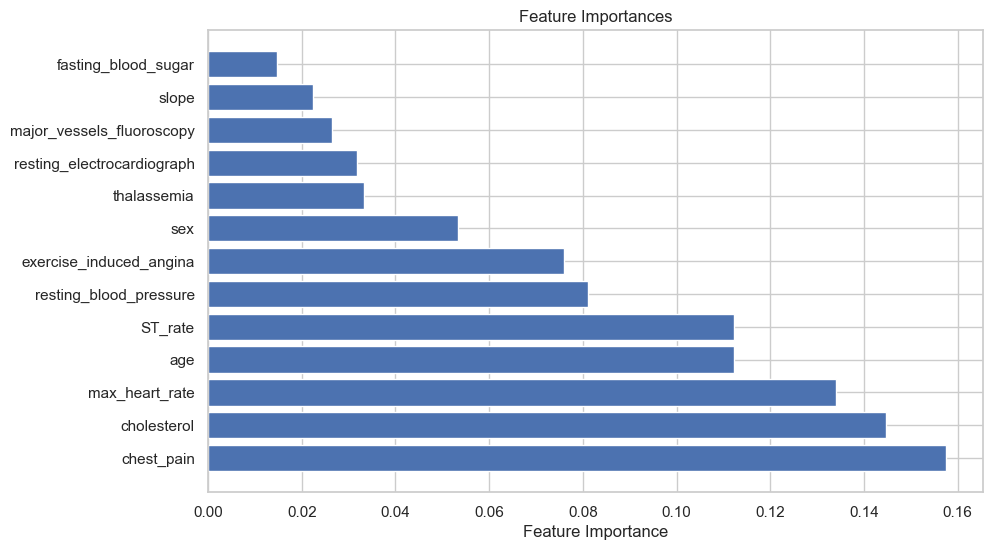

In [ ]:
feature_importances = rf_model.feature_importances_

features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), features[indices])
plt.xlabel("Feature Importance")
plt.show()


In [ ]:
importances = rf_model.feature_importances_

feature_names = X_train.columns.tolist()
feature_importance_list = list(zip(feature_names, importances))

feature_importance_list_sorted = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

importance_values = [val for _, val in feature_importance_list_sorted]

print("Feature Importance Values (sorted):")
print(importance_values)

feature_importance_list = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance_list:
    print(f"{feature}: {importance:.4f}")



Feature Importance Values (sorted):
[np.float64(0.15755443388503526), np.float64(0.14472309016142035), np.float64(0.13412969161219818), np.float64(0.11235226835416491), np.float64(0.11224435544505333), np.float64(0.08105893114915118), np.float64(0.07599109507506971), np.float64(0.0532892721871569), np.float64(0.03333102441857582), np.float64(0.03177827224655819), np.float64(0.02635129164998589), np.float64(0.022392055270312124), np.float64(0.014804218545318241)]
chest_pain: 0.1576
cholesterol: 0.1447
max_heart_rate: 0.1341
age: 0.1124
ST_rate: 0.1122
resting_blood_pressure: 0.0811
exercise_induced_angina: 0.0760
sex: 0.0533
thalassemia: 0.0333
resting_electrocardiograph: 0.0318
major_vessels_fluoroscopy: 0.0264
slope: 0.0224
fasting_blood_sugar: 0.0148


In [97]:
selected_features = ['chest_pain','cholesterol', 'max_heart_rate','age','ST_rate','resting_blood_pressure', 'exercise_induced_angina', 'sex']
x1 = df[selected_features]
y1 = df['target']

# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42, stratify=y)


In [ ]:
rf_1 = RandomForestClassifier(random_state=42)
rf_1.fit(X1_train, y1_train)

y1_pred = rf_1.predict(X1_test)
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))
print("Accuracy:", accuracy_score(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        82
           1       0.83      0.88      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

[[63 19]
 [12 90]]
Accuracy: 0.8315217391304348


In [ ]:
top_features = ['cholesterol', 'chest_pain', 'max_heart_rate', 
                'age', 'ST_rate', 'exercise_induced_angina']

x2 = df[top_features]
y2 = df['target']

X2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42, stratify=y)

rf_2 = RandomForestClassifier(random_state=42)
rf_2.fit(X2_train, y2_train)

y2_pred = rf_2.predict(x2_test)
print(classification_report(y2_test, y2_pred))
print(confusion_matrix(y2_test, y2_pred))
print("Accuracy:", accuracy_score(y2_test, y2_pred))



              precision    recall  f1-score   support

           0       0.79      0.70      0.74        82
           1       0.78      0.85      0.81       102

    accuracy                           0.78       184
   macro avg       0.78      0.77      0.78       184
weighted avg       0.78      0.78      0.78       184

[[57 25]
 [15 87]]
Accuracy: 0.782608695652174


In [ ]:

logreg_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
svm_model = SVC(random_state=42, class_weight='balanced')

scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [ ]:
logreg_model.fit(X1_train, y1_train)
dt_model.fit(X1_train, y1_train)
svm_model.fit(X1_train, y1_train)

y_pred_logreg = logreg_model.predict(X1_test)
y_pred_dt = dt_model.predict(X1_test)
y_pred_svm = svm_model.predict(X1_test)

print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y1_test, y_pred_logreg))

print("\nDecision Tree Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y_pred_dt))
print("Classification Report:\n", classification_report(y1_test, y_pred_dt))

print("\nSVM Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y_pred_svm))
print("Classification Report:\n", classification_report(y1_test, y_pred_svm))


Logistic Regression Evaluation:
Accuracy: 0.8043478260869565
Confusion Matrix:
 [[66 16]
 [20 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        82
           1       0.84      0.80      0.82       102

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184


Decision Tree Evaluation:
Accuracy: 0.7608695652173914
Confusion Matrix:
 [[57 25]
 [19 83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72        82
           1       0.77      0.81      0.79       102

    accuracy                           0.76       184
   macro avg       0.76      0.75      0.76       184
weighted avg       0.76      0.76      0.76       184


SVM Evaluation:
Accuracy: 0.8097826086956522
Confusion Matrix:
 [[65 17]
 [18 84]]
Classification Report

## 6. Retrain the model with top features and remodeling with XGB classifier

Confusion Matrix:
[[63 12]
 [16 93]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        75
           1       0.89      0.85      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184

Accuracy Score:
0.8478260869565217


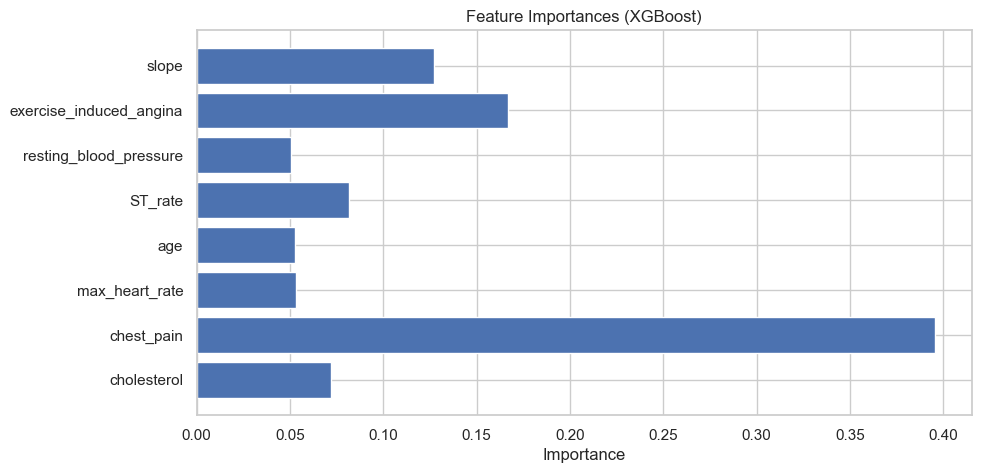

In [ ]:

top_features = ['cholesterol', 'chest_pain', 'max_heart_rate', 'age', 
                'ST_rate', 'resting_blood_pressure', 
                'exercise_induced_angina', 'slope']

X_top = df[top_features]
y_xg = df['target']  

X_train, X_test, y_train, y_test = train_test_split(X_top, y_xg, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

# 
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

importances = xgb_model.feature_importances_
plt.figure(figsize=(10, 5))
plt.barh(top_features, importances)
plt.title('Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

xgb_model = XGBClassifier( eval_metric='logloss',random_state=42)


param_grid = {'n_estimators': [100, 150, 200],'max_depth': [3, 4, 5],'learning_rate': [0.01, 0.05, 0.1],'subsample': [0.8, 1.0],
'colsample_bytree': [0.8, 1.0]
}


grid_search = GridSearchCV(estimator=xgb_model,param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1,verbose=1)


grid_search.fit(X_train_scaled, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy from CV:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Accuracy from CV: 0.7907887479316051


## 7. Hyperparameter Tuning (XGBoost)
- Performed GridSearchCV with 5-fold cross-validation.
- Tuned parameters:
  - `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`
- **Best Parameters**: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
- **Best Cross-Validated Accuracy**: 0.7907887479316051

In [ ]:

acc_logreg = accuracy_score(y1_test, y_pred_logreg)
acc_dt = accuracy_score(y1_test, y_pred_dt)
acc_svm = accuracy_score(y1_test, y_pred_svm)
acc_rf = accuracy_score(y1_test, y1_pred)
acc_xgb = accuracy_score(y_test, y_pred)


results = {
    "Model": ["Logistic Regression", "Decision Tree", "SVM", "Random Forest", "XGBoost"],
    "Accuracy": [acc_logreg, acc_dt, acc_svm, acc_rf, acc_xgb]
}

df_results = pd.DataFrame(results)
df_results.sort_values(by="Accuracy", ascending=False, inplace=True)
df_results.reset_index(drop=True, inplace=True)
df_results


,Model,Accuracy
0,Random Forest,0.831522
1,XGBoost,0.820652
2,SVM,0.809783
3,Logistic Regression,0.804348
4,Decision Tree,0.760870


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\225835034.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_acc, x="Model", y="Accuracy", palette="viridis", legend=False)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\225835034.py:12: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Lenovo\OneDrive\Desktop\DSML\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


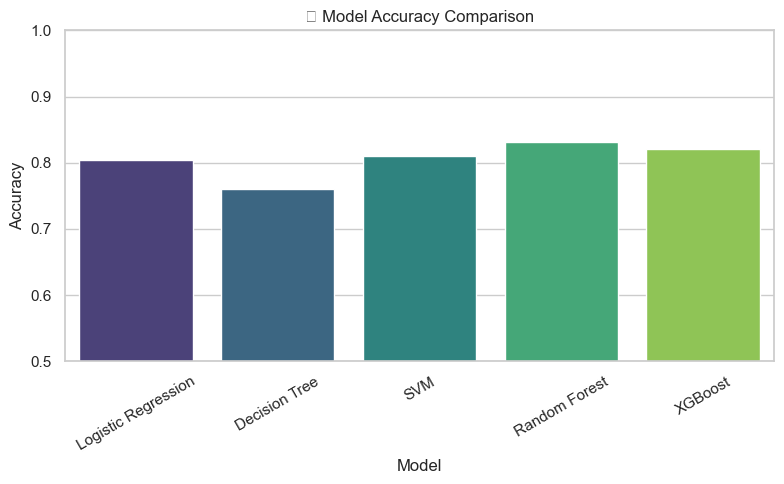

In [ ]:
model_names = ["Logistic Regression", "Decision Tree", "SVM", "Random Forest", "XGBoost"]
accuracies = [acc_logreg, acc_dt, acc_svm, acc_rf, acc_xgb] 

df_acc = pd.DataFrame({"Model": model_names, "Accuracy": accuracies})

plt.figure(figsize=(8, 5))
sns.barplot(data=df_acc, x="Model", y="Accuracy", palette="viridis", legend=False)
plt.title("🏆 Model Accuracy Comparison")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



## 8. Conclusion
- XGBoost's GridSearch result (0.79) means it generalized well across folds — it's more reliable.

- Random Forest's 0.85 might be:

     - Actually better on this split

     - Overfitting slightly to the specific train-test split

- Using different preprocessing or feature selection logic
     - The XGBoost model with selected features and tuned parameters performed best.
     - However Random Forest Classifier was more on accuracy score. 
     - But if RF consistently performs better on new unseen data, it may truly be the better model.

# 9. Final Inferences 

- After testing multiple models and tuning parameters:
- **XGBoost** showed strong cross-validation consistency (~0.79)
- **Random Forest** had the highest accuracy (0.85), but may slightly overfit
- Given the trade-off between performance and generalization, **XGBoost is the preferred choice** for deployment